In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [184]:
# Import your dataset using pandas and Create a dataframe
dataset = pd.read_csv('housing.data2.csv', header = None, sep = '\s+')

# Convert your dataset to csv file
# Then use the print() function to generate output
print(dataset)
X = dataset.iloc[:,:].values

          0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90

In [185]:
# As you notice, the dataset does not have any column names. 
# Assign the column names (you can find out the column names from 
# below description of dataset) to get a clear idea about the features.
dataset.columns=('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV')
# Use head() function
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [186]:
cdf = dataset[['LSTAT','MEDV']]
cdf.head(9)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
5,5.21,28.7
6,12.43,22.9
7,19.15,27.1
8,29.93,16.5


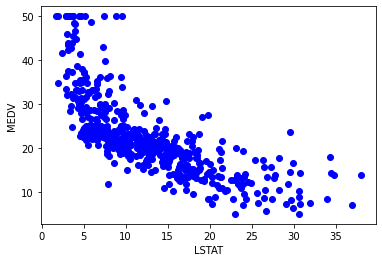

In [187]:
plt.scatter(cdf.LSTAT, cdf.MEDV,  color='blue')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(dataset))
print(scaler.data_max_)
print(scaler.transform(dataset))

MinMaxScaler()
[ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
  24.     711.      22.     396.9     37.97    50.    ]
[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.89737254e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 4.20000000e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.91300620e-01
  1.31070640e-01 3.77777778e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 1.53333333e-01]]


In [194]:
msk = np.random.rand(len(dataset)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [195]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['LSTAT']])
train_Y = np.asanyarray(train[['MEDV']])

test_x = np.asanyarray(test[['LSTAT']])
test_Y = np.asanyarray(test[['MEDV']])

poly1 = PolynomialFeatures(degree=1)
train_x_poly1 = poly1.fit_transform(train_x)
train_x_poly1

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
train_x_poly3

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       [  1.      ,   5.33    ,  28.4089  , 151.419437],
       ...,
       [  1.      ,   5.64    ,  31.8096  , 179.406144],
       [  1.      ,   6.48    ,  41.9904  , 272.097792],
       [  1.      ,   7.88    ,  62.0944  , 489.303872]])

In [196]:
clf1 = linear_model.LinearRegression()
clf = linear_model.LinearRegression()
clf3 = linear_model.LinearRegression()
train_y1 = clf1.fit(train_x_poly1, train_Y)
train_y_ = clf.fit(train_x_poly, train_Y)
train_y3 = clf3.fit(train_x_poly3, train_Y)
# The coefficients
print ('Coefficients: ', clf1.coef_)
print ('Intercept: ',clf1.intercept_)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

Coefficients:  [[ 0.         -0.97300563]]
Intercept:  [34.99293451]
Coefficients:  [[ 0.         -2.44457902  0.04694489]]
Intercept:  [43.73472259]
Coefficients:  [[ 0.00000000e+00 -3.87600914e+00  1.45580498e-01 -1.89346750e-03]]
Intercept:  [49.13139784]


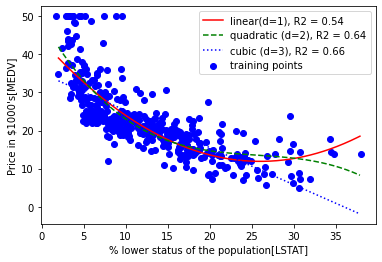

In [197]:
plt.scatter(train.LSTAT, train.MEDV, color='blue')
XX1 = np.arange(2.0, 38.0, 0.1)
yy1 = clf1.intercept_[0]+ clf1.coef_[0][1]*XX1
XX = np.arange(2.0, 38.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX,2)
XX3 = np.arange(2.0, 38.0, 0.1)
yy3 = clf3.intercept_[0]+ clf3.coef_[0][1]*XX3+ clf3.coef_[0][2]*np.power(XX3,2)+ clf3.coef_[0][3]*np.power(XX3,3)
plt.plot(XX, yy, '-r')
plt.plot(XX3, yy3, '--g')
plt.plot(XX1, yy1, ':b')
plt.legend(['linear(d=1), R2 = 0.54', 'quadratic (d=2), R2 = 0.64', 'cubic (d=3), R2 = 0.66','training points'])
plt.xlabel("% lower status of the population[LSTAT]")
plt.ylabel("Price in $1000's[MEDV]")
plt.show()

In [198]:
from sklearn.metrics import r2_score
test_x_poly1 = poly1.fit_transform(test_x)
test_y_1 = clf1.predict(test_x_poly1)
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
test_x_poly3 = poly3.fit_transform(test_x)
test_y_3 = clf3.predict(test_x_poly3)

print("Linear (d=1):")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_1 - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_1 - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_1, test_Y))
print("\nQuadratic (d=2):")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_Y))
print("\nCubic (d=3):")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_3 - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_3 - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_3, test_Y))

print("\nThe cubic fit (d=3) is the best fit because it has the highest R2 score and the lowest MSE")

Linear (d=1):
Mean absolute error: 4.77
Residual sum of squares (MSE): 35.84
R2-score: 0.32

Quadratic (d=2):
Mean absolute error: 4.40
Residual sum of squares (MSE): 31.01
R2-score: 0.43

Cubic (d=3):
Mean absolute error: 4.24
Residual sum of squares (MSE): 28.37
R2-score: 0.51

The cubic fit (d=3) is the best fit because it has the highest R2 score and the lowest MSE
